In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.utils as np_utils


In [2]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [7]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

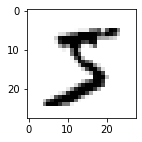

In [8]:
plot_image(x_Train[0])

In [9]:
y_Train[0]

5

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

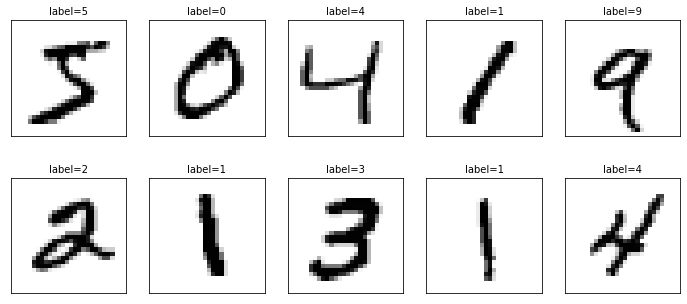

In [11]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

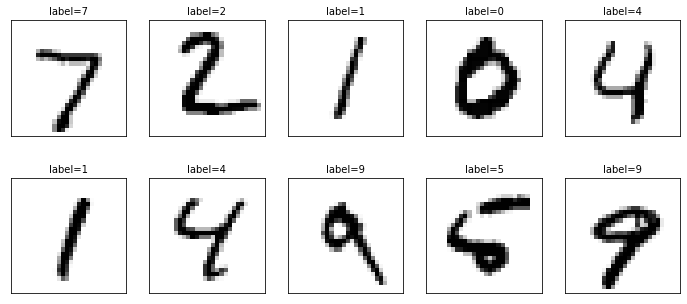

In [12]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [13]:
x_Train.shape

(60000, 28, 28)

In [14]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [15]:
x_Train4D.shape

(60000, 28, 28, 1)

In [16]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [17]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [18]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 建立CNN模型

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [21]:
model = Sequential()

In [22]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [23]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [27]:
# 平坦化
model.add(Flatten())

In [28]:
model.add(Dense(128, activation='relu'))

In [29]:
model.add(Dropout(0.5))

In [30]:
model.add(Dense(10,activation='softmax'))

In [31]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## 訓練模型

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [33]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 34s - loss: 0.4857 - accuracy: 0.8486 - val_loss: 0.0979 - val_accuracy: 0.9707
Epoch 2/20
160/160 - 21s - loss: 0.1379 - accuracy: 0.9590 - val_loss: 0.0652 - val_accuracy: 0.9822
Epoch 3/20
160/160 - 21s - loss: 0.0987 - accuracy: 0.9714 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 4/20
160/160 - 21s - loss: 0.0766 - accuracy: 0.9768 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 5/20
160/160 - 22s - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 6/20
160/160 - 22s - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0388 - val_accuracy: 0.9894
Epoch 7/20
160/160 - 21s - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0404 - val_accuracy: 0.9893
Epoch 8/20
160/160 - 20s - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0367 - val_accuracy: 0.9906
Epoch 9/20
160/160 - 22s - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 10/20
160/160 - 22s - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0338 - val_accura

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

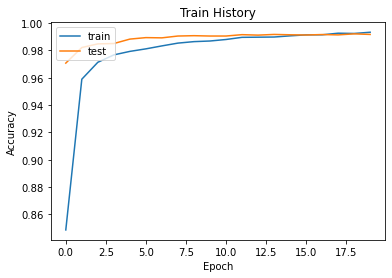

In [38]:
show_train_history('accuracy','val_accuracy')

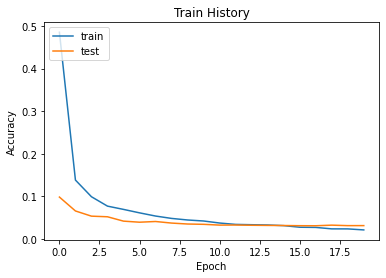

In [39]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [40]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9934


0.993399977684021

# 預測結果

In [41]:
prediction=model.predict_classes(x_Test4D_normalize)

/Users/yehjames/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [53]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
        if idx >= len(images):
            break
    plt.show()

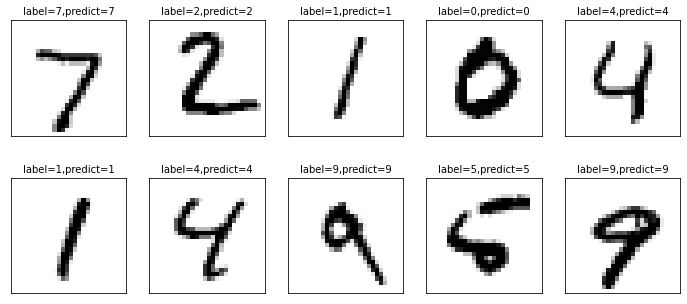

In [44]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix


In [45]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,0,1,0,0,0
2,2,1,1026,0,0,0,0,3,0,0
3,0,0,0,1005,0,3,0,1,1,0
4,0,0,0,0,976,0,0,0,1,5
5,0,0,0,2,0,887,1,0,0,2
6,2,2,0,0,2,6,946,0,0,0
7,0,1,3,0,0,0,0,1022,1,1
8,1,1,2,2,0,0,0,1,965,2


In [46]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [47]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3


In [48]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([1393, 2597], dtype='int64')

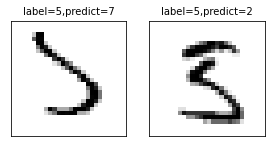

In [54]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)